In [1]:
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
infection_path = "Infection Data/out.csv"
infection_data = pd.read_csv(infection_path)
infection_data = infection_data.drop("Unnamed: 0", axis=1)
infection_data

,GEO,Gender,Age group,VALUE
0,Atlantic Region,Female,0 to 19 years,32223
1,Atlantic Region,Female,20 to 29 years,48462
2,Atlantic Region,Female,30 to 39 years,49398
3,Atlantic Region,Female,40 to 49 years,46947
4,Atlantic Region,Female,50 to 59 years,48744
...,...,...,...,...
115,Quebec Region,"Not stated, gender",40 to 49 years,633
116,Quebec Region,"Not stated, gender",50 to 59 years,405
117,Quebec Region,"Not stated, gender",60 to 69 years,195
118,Quebec Region,"Not stated, gender",70 to 79 years,96


In [2]:
Gender_df = infection_data.groupby(['GEO', 'Gender'], as_index=False).sum(['VALUE'])
Gender_df

,GEO,Gender,VALUE
0,Atlantic Region,Female,320826
1,Atlantic Region,Male,219912
2,Atlantic Region,"Not stated, gender",258
3,British Columbia and Yukon Region,Female,614295
4,British Columbia and Yukon Region,Male,568656
5,British Columbia and Yukon Region,"Not stated, gender",4887
6,Ontario and Nunavut Region,Female,2632512
7,Ontario and Nunavut Region,Male,2130618
8,Ontario and Nunavut Region,"Not stated, gender",31755
9,Prairies and Northwest Territories Region,Female,1467321


In [3]:
Girls_df = Gender_df[Gender_df['Gender'].str.contains('Female', case=False)]
Girls_df
Boys_df = Gender_df[Gender_df['Gender'].str.match('Male', case=False)]

Nonbinary_df = Gender_df[Gender_df['Gender'].str.contains('Not stated, gender', case=False)]
Nonbinary_df

,GEO,Gender,VALUE
2,Atlantic Region,"Not stated, gender",258
5,British Columbia and Yukon Region,"Not stated, gender",4887
8,Ontario and Nunavut Region,"Not stated, gender",31755
11,Prairies and Northwest Territories Region,"Not stated, gender",990
14,Quebec Region,"Not stated, gender",4518


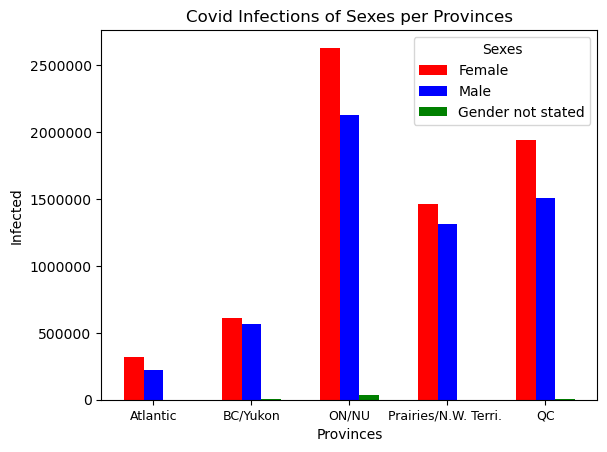

In [4]:
x = [0.8, 1.8, 2.8, 3.8, 4.8]
x2 = [1, 2, 3, 4, 5]
x3 = [1.2, 2.2, 3.2, 4.2, 5.2]
plt.yscale('linear')
plt.bar(x, Girls_df["VALUE"], 0.2, color='red')
plt.ticklabel_format(style='plain') 
plt.bar(x2, Boys_df["VALUE"], 0.2, color='blue')
plt.bar(x3, Nonbinary_df["VALUE"], 0.2, color='green')
plt.xticks(x2, ['Atlantic', 'BC/Yukon', 'ON/NU', 'Prairies/N.W. ', 'QC'], fontsize=9)
plt.xlabel("Provinces")
plt.ylabel("Infected")
plt.legend(["Female", "Male", "Gender not stated"], title = "Sexes")
plt.title("Covid Infections of Sexes per Provinces")
plt.savefig("Output/InfectBySexes.png")
plt.show()

In [5]:
age_df = infection_data.groupby(['GEO', 'Age group'], as_index=False).sum(['VALUE'])
age_df

,GEO,Age group,VALUE
0,Atlantic Region,0 to 19 years,63291
1,Atlantic Region,20 to 29 years,77034
2,Atlantic Region,30 to 39 years,77223
3,Atlantic Region,40 to 49 years,72870
4,Atlantic Region,50 to 59 years,81222
5,Atlantic Region,60 to 69 years,62091
6,Atlantic Region,70 to 79 years,47985
7,Atlantic Region,80 years and over,59280
8,British Columbia and Yukon Region,0 to 19 years,200769
9,British Columbia and Yukon Region,20 to 29 years,222321


In [6]:
group1_df = age_df[age_df['Age group'].str.contains('19', case=False)]
group2_df = age_df[age_df['Age group'].str.contains('29', case=False)]
group3_df = age_df[age_df['Age group'].str.contains('39', case=False)]
group4_df = age_df[age_df['Age group'].str.contains('49', case=False)]
group5_df = age_df[age_df['Age group'].str.contains('59', case=False)]
group6_df = age_df[age_df['Age group'].str.contains('69', case=False)]
group7_df = age_df[age_df['Age group'].str.contains('79', case=False)]
group8_df = age_df[age_df['Age group'].str.contains('80', case=False)]
group8_df

,GEO,Age group,VALUE
7,Atlantic Region,80 years and over,59280
15,British Columbia and Yukon Region,80 years and over,84216
23,Ontario and Nunavut Region,80 years and over,390324
31,Prairies and Northwest Territories Region,80 years and over,159966
39,Quebec Region,80 years and over,276867


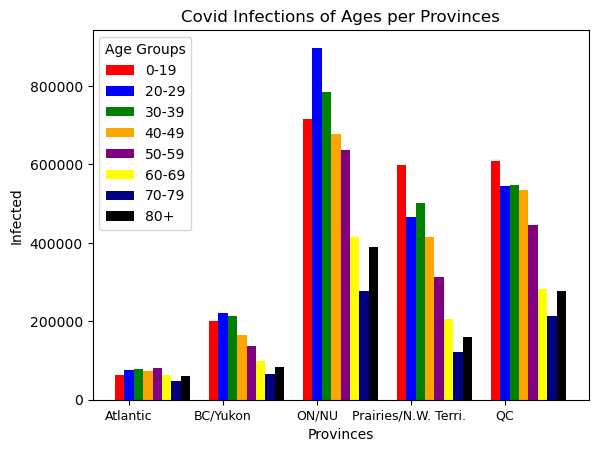

In [7]:

x1 = [0.5, 1.5, 2.5, 3.5, 4.5]
x2 = [0.6, 1.6, 2.6, 3.6, 4.6]
x3 = [0.7, 1.7, 2.7, 3.7, 4.7]
x4 = [0.8, 1.8, 2.8, 3.8, 4.8]
x5 = [0.9, 1.9, 2.9, 3.9, 4.9]
x6 = [1, 2, 3, 4, 5]
x7 = [1.1, 2.1, 3.1, 4.1, 5.1]
x8 = [1.2, 2.2, 3.2, 4.2, 5.2]

plt.yscale('linear')
plt.ticklabel_format(style='plain')
plt.bar(x1, group1_df["VALUE"], 0.1, color='red')
plt.bar(x2, group2_df["VALUE"], 0.1, color='blue')
plt.bar(x3, group3_df["VALUE"], 0.1, color='green')
plt.bar(x4, group4_df["VALUE"], 0.1, color='orange')
plt.bar(x5, group5_df["VALUE"], 0.1, color='purple')
plt.bar(x6, group6_df["VALUE"], 0.1, color='yellow')
plt.bar(x7, group7_df["VALUE"], 0.1, color='navy')
plt.bar(x8, group8_df["VALUE"], 0.1, color='black')
plt.xticks(x2, ['Atlantic', 'BC/Yukon', 'ON/NU', 'Prairies/N.W. Terri. ', 'QC'], fontsize=9)
plt.xlabel("Provinces")
plt.ylabel("Infected")
plt.legend(["0-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"], title = "Age Groups")
plt.title("Covid Infections of Ages per Provinces")
plt.savefig("Output/InfectByAges.png")
plt.show()